# Customer Segmentation on E-Commerce Dataset

In [126]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno 
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from pandasql import sqldf
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [130]:
# Importing the data
df = pd.read_csv('data.csv',encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [132]:
# Let's create a Total_Price Column which gives us the total price a customer has spend on a product
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [133]:
# Checking for null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total_Price         0
dtype: int64

In [134]:
# We'll replace all the NAN values with 0's
df1 = df.fillna(0)

In [135]:
total_revenue = df1.Total_Price.sum()
print('Total Revenue is:',round(total_revenue,2))

Total Revenue is: 9747747.93


In [136]:
# We'll split the Invoice Date into Month and Year
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])
df1['Month'] = df1['InvoiceDate'].dt.month
df1['Year'] = df1['InvoiceDate'].dt.year

In [137]:
# Total purchases made in that year 
yr_pur = df1.groupby(df1['InvoiceDate'].dt.year).count().InvoiceDate
yr_pur

InvoiceDate
2010     42481
2011    499428
Name: InvoiceDate, dtype: int64

In [138]:
# Month wise total purchases
amt_per_mnt = df1.groupby(['Year','Month'])['Total_Price'].sum()
amt_per_mnt

Year  Month
2010  12        748957.020
2011  1         560000.260
      2         498062.650
      3         683267.080
      4         493207.121
      5         723333.510
      6         691123.120
      7         681300.111
      8         682680.510
      9        1019687.622
      10       1070704.670
      11       1461756.250
      12        433668.010
Name: Total_Price, dtype: float64

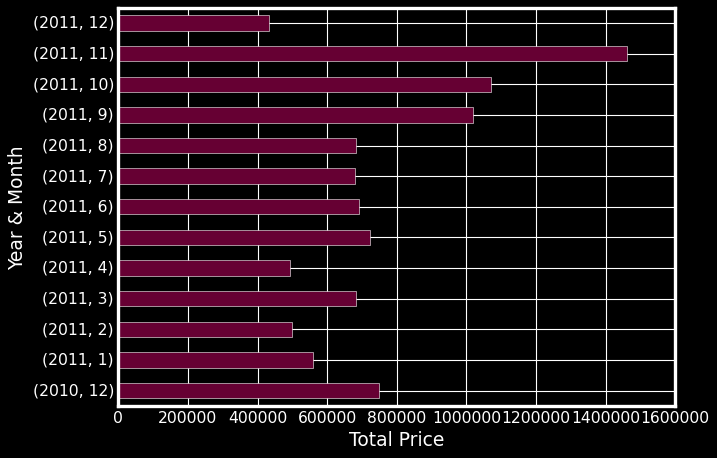

In [139]:
plt.style.use('dark_background')
ax = amt_per_mnt.plot(kind='barh',color = '#660033')
ax.set_xlabel("Total Price")
ax.set_ylabel("Year & Month")
plt.show()

In [274]:
# Top 5 products that generated the highest revenue
high_rev = df1[['StockCode','Description','Quantity','Total_Price']].groupby(['StockCode','Description'],as_index=False).sum(['Quantity','Total_Price']).sort_values(by='Quantity',ascending=False).sort_values(by='Total_Price', ascending=False)
high_rev.head(5)

,StockCode,Description,Quantity,Total_Price
5737,DOT,DOTCOM POSTAGE,707,206245.48
1931,22423,REGENCY CAKESTAND 3 TIER,13033,164762.19
3877,47566,PARTY BUNTING,18022,98302.98
5100,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025,97715.99
5068,85099B,JUMBO BAG RED RETROSPOT,47363,92356.03


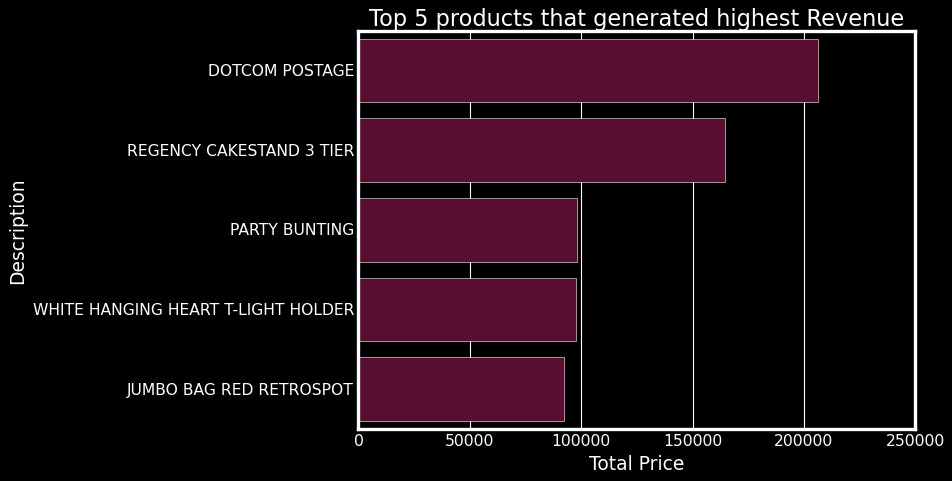

In [275]:
plt.style.use('dark_background')
ax = sns.barplot(x='Total_Price',y='Description', data=high_rev.head(5), color='#660033')
ax.set_xlabel("Total Price")
ax.set_ylabel("Description")
ax.set_title("Top 5 products that generated highest Revenue")
plt.show()

In [142]:
# Most purchased products
top_prod = df1[['StockCode','Description','Quantity','Total_Price']].groupby(['StockCode','Description'],as_index=False).sum(['Quantity','Total_Price']).sort_values(by='Quantity',ascending=False)
top_prod = top_prod[top_prod['StockCode'].str.contains('^[1-9]')]
top_prod.head()

,StockCode,Description,Quantity,Total_Price
4283,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
5068,85099B,JUMBO BAG RED RETROSPOT,47363,92356.03
4759,84879,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
1695,22197,POPCORN HOLDER,36334,33969.46
691,21212,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72


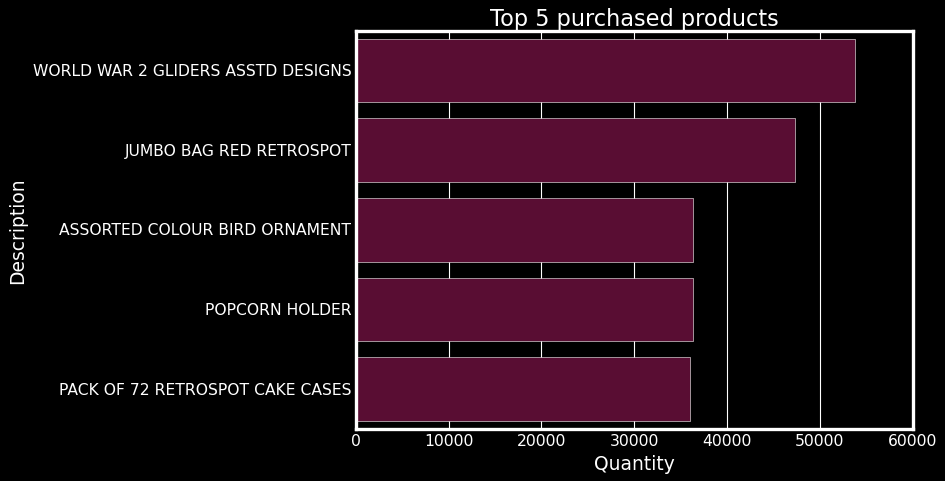

In [143]:
plt.style.use('dark_background')
ax = sns.barplot(x='Quantity',y='Description', data=top_prod.head(), color='#660033')
ax.set_xlabel("Quantity")
ax.set_ylabel("Description")
ax.set_title("Top 5 purchased products")
plt.show()

In [144]:
top_countries=df1[['Country','Quantity','Total_Price']].groupby(['Country'],as_index=False).sum().sort_values(by='Quantity',ascending=False)
top_countries.head()

,Country,Quantity,Total_Price
36,United Kingdom,4263829,8187806.364
24,Netherlands,200128,284661.540
10,EIRE,142637,263276.820
14,Germany,117448,221698.210
13,France,110480,197403.900


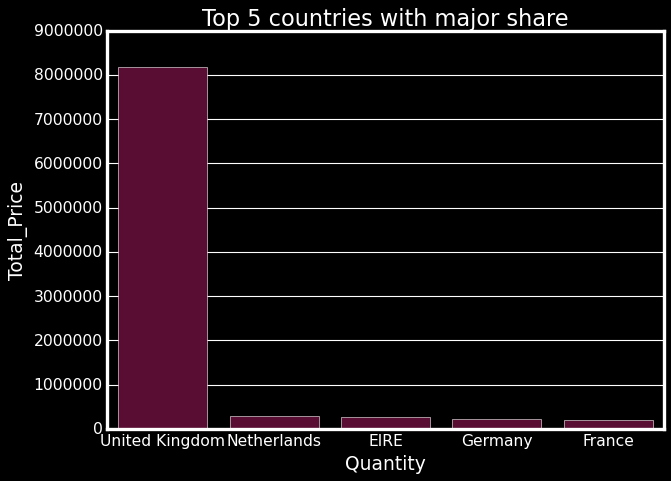

In [145]:
plt.style.use('dark_background')
ax = sns.barplot(x='Country',y='Total_Price', data=top_countries.head(), color='#660033')
ax.set_xlabel("Quantity")
ax.set_ylabel("Total_Price")
ax.set_title("Top 5 countries with major share")
plt.show()

In [148]:
# Purchases made by customer
df_cust = sqldf("SELECT CustomerID, COUNTRY, COUNT(InvoiceNo) AS Total_purchases, SUM(Total_Price) as Total_Price, SUM(Quantity) as Quantity FROM df GROUP BY CustomerID ORDER BY Quantity desc;")
df_cust.head()

,CustomerID,Country,Total_purchases,Total_Price,Quantity
0,NaN,United Kingdom,135080,1447682.12,269562
1,14646.0,Netherlands,2085,279489.02,196719
2,12415.0,Australia,778,123725.45,77242
3,14911.0,EIRE,5903,132572.62,77180
4,17450.0,United Kingdom,351,187482.17,69029


In [149]:
df_cust.dropna(inplace=True)

[Text(0.5, 1.0, 'Quantity vs Revenue per client')]

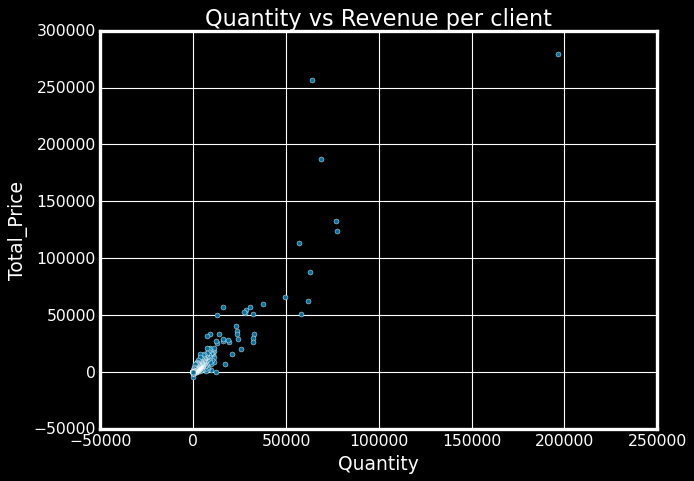

In [155]:
sns.scatterplot(x="Quantity",y="Total_Price",data=df_cust).set(title='Quantity vs Revenue per client')

#### We could clearly identify the outliers in the above plot. So, inorder to get better clusters, it would be better to remove the outliers.

[Text(0.5, 1.0, 'Quantity vs Revenue per client')]

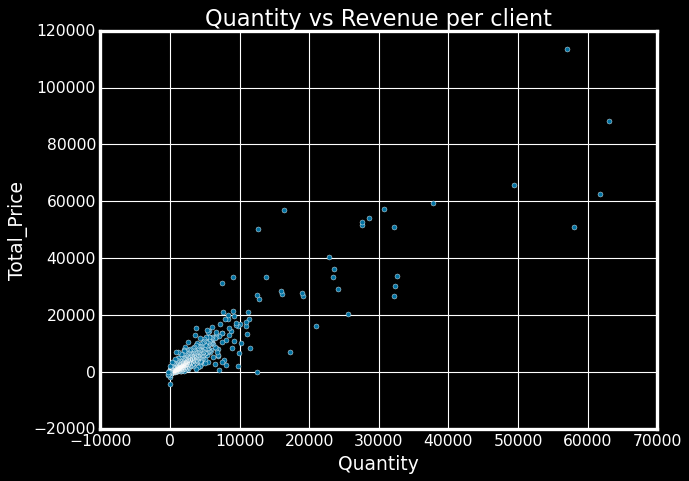

In [156]:
df_clusters = sqldf("SELECT CustomerID, Total_purchases, Total_Price, Quantity FROM df_cust WHERE Total_Price <150000 and Quantity <70000")
sns.scatterplot(x="Quantity",y="Total_Price",data=df_clusters).set(title='Quantity vs Revenue per client')


In [157]:
scaler = MinMaxScaler()
scaler.fit(df_clusters[['Quantity']])

df_clusters['Quantity_scaled'] = scaler.transform(df_clusters[['Quantity']])
scaler.fit(df_clusters[['Total_Price']])

df_clusters['Revenue_scaled'] = scaler.transform(df_clusters[['Total_Price']])
df_clusters.head()

,CustomerID,Total_purchases,Total_Price,Quantity,Quantity_scaled,Revenue_scaled
0,17511.0,1076,88125.38,63012,1.000000,0.785346
1,13694.0,585,62653.10,61803,0.980905,0.568877
2,14298.0,1640,50862.44,58021,0.921172,0.468677
3,14156.0,1420,113384.14,57025,0.905441,1.000000
4,16684.0,281,65892.08,49390,0.784854,0.596402


## KMeans

[Text(0.5, 0, 'k'), Text(0, 0.5, 'Sum of Squared Error')]

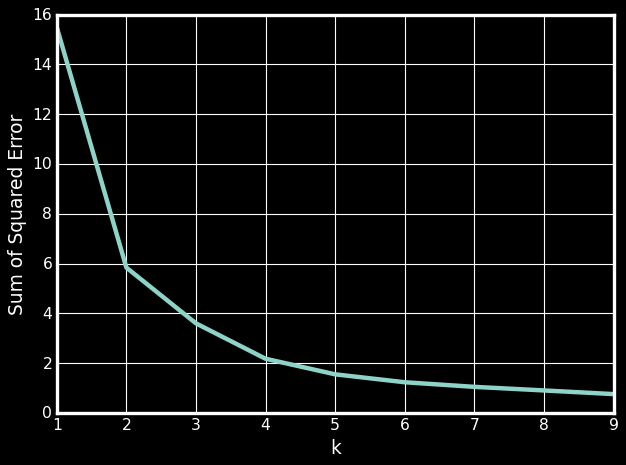

In [159]:
# We'll now find the number of clusters needed using the Elbow Method

lst = []
k = range(1,10)

for i in k:
    algo = KMeans(n_clusters=i)
    algo.fit(df_clusters[['Quantity_scaled','Revenue_scaled']])
    lst.append(algo.inertia_)

sns.lineplot(x=k,y=lst).set(xlabel='k', ylabel='Sum of Squared Error')

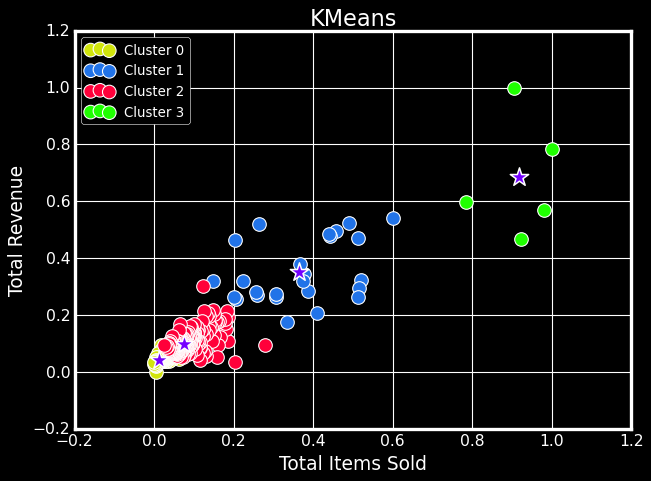

In [269]:
km = KMeans(n_clusters=4)
pts = df_clusters[['Quantity_scaled','Revenue_scaled']].to_numpy()
y_algo = km.fit_predict(pts)

Cluster_0 = sns.scatterplot(x=pts[y_algo ==0,0], y=pts[y_algo == 0,1], s=150, color='#D1E50C')
Cluster_1 = sns.scatterplot(x=pts[y_algo ==1,0], y=pts[y_algo == 1,1], s=150, color='#2173E8')
Cluster_2 = sns.scatterplot(x=pts[y_algo ==2,0], y=pts[y_algo == 2,1], s=150, color='#FF003A')
Cluster_3 = sns.scatterplot(x=pts[y_algo ==3,0], y=pts[y_algo == 3,1], s=150, color='#1FFF00')

ax = sns.scatterplot(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],color='#7400FF',marker='*',label='centroid',s=300)
ax.set_xlabel("Total Items Sold")
ax.set_ylabel("Total Revenue")
ax.set_title("KMeans")
plt.legend(labels = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3'],fontsize = "12",loc=2)

In [246]:
km_score1 = metrics.silhouette_score(df_clusters[['Quantity_scaled','Revenue_scaled']], km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % km_score1)

Silhouetter Score: 0.797


In [304]:
km_score2 = metrics.calinski_harabasz_score(df_clusters[['Quantity_scaled','Revenue_scaled']], km.labels_)
print('Calinski Harabasz Index: %.3f' % km_score2)

Calinski Harabasz Index: 8887.658


In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
    marker='o', s=30, linewidths=8,
    color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
    marker='x', s=50, linewidths=50,
    color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
    np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
    cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
    linewidths=1, colors='k')

    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

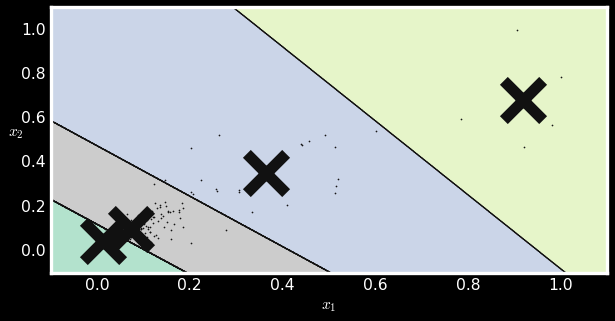

In [282]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(km, pts)
plt.show()

## Agglomerative Clustering

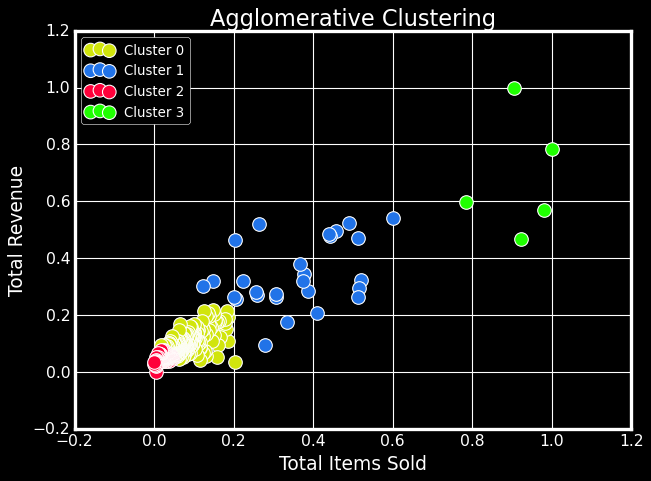

In [258]:
ac = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_ac = ac.fit_predict(pts)

sns.scatterplot(x=pts[y_ac ==0,0], y=pts[y_ac == 0,1], s=150, color='#D1E50C')
sns.scatterplot(x=pts[y_ac ==1,0], y=pts[y_ac == 1,1], s=150, color='#2173E8')
sns.scatterplot(x=pts[y_ac ==2,0], y=pts[y_ac == 2,1], s=150, color='#FF003A')
sns.scatterplot(x=pts[y_ac ==3,0], y=pts[y_ac == 3,1], s=150, color='#1FFF00')

plt.xlabel('Total Items Sold')
plt.ylabel('Total Revenue')
plt.title('Agglomerative Clustering')
plt.legend(labels = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3'],fontsize = "12",loc=2)

In [239]:
ac_score1 = metrics.silhouette_score(df_clusters[['Quantity_scaled','Revenue_scaled']], ac.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % ac_score1)

Silhouetter Score: 0.759


In [303]:
ac_score2 = metrics.calinski_harabasz_score(df_clusters[['Quantity_scaled','Revenue_scaled']], ac.labels_)
print('Calinski Harabasz Index: %.3f' % ac_score2)

Calinski Harabasz Index: 8372.566


## DBScan

Text(0, 0.5, 'Total Revenue')

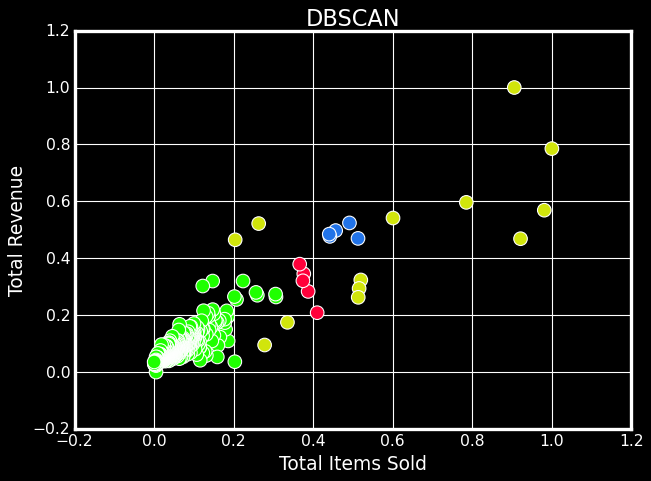

In [266]:
dbs = DBSCAN(eps=0.08,min_samples=4)
dbs.fit(pts)
y_pred = dbs.fit_predict(pts)

sns.scatterplot(x=pts[:,0], y=pts[:,1], s=150, hue=y_pred, legend=False, palette=["#D1E50C", "#2173E8", "#FF003A","#1FFF00"]).set_title("DBSCAN")
plt.xlabel('Total Items Sold')
plt.ylabel('Total Revenue')

In [267]:
dbs_score1 = metrics.silhouette_score(df_clusters[['Quantity_scaled','Revenue_scaled']], dbs.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % dbs_score1)

Silhouetter Score: 0.939


In [302]:
dbs_score2 = metrics.calinski_harabasz_score(df_clusters[['Quantity_scaled','Revenue_scaled']], dbs.labels_)
print('Calinski Harabasz Index: %.3f' % dbs_score2)

Calinski Harabasz Index: 2409.265


## MiniBatchKMeans

In [291]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=4,random_state=0)
mbk.fit(pts)

MiniBatchKMeans(n_clusters=4, random_state=0)

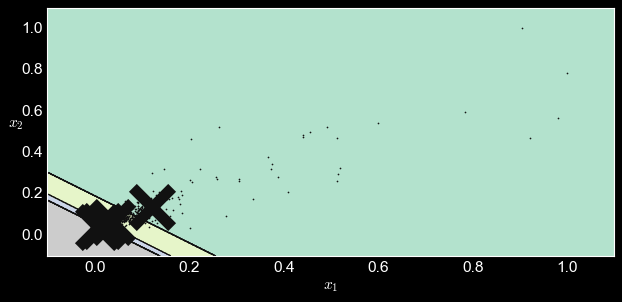

In [292]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(mbk, pts)
plt.show()

In [294]:
mbk_score1 = metrics.silhouette_score(df_clusters[['Quantity_scaled','Revenue_scaled']], mbk.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % mbk_score1)

Silhouetter Score: 0.521


In [301]:
mbk_score2 = metrics.calinski_harabasz_score(df_clusters[['Quantity_scaled','Revenue_scaled']], mbk.labels_)
print('Calinski Harabasz Index: %.3f' % mbk_score2)

Calinski Harabasz Index: 1474.852


#### Time taken by the Algorithms

In [298]:
%timeit km.fit(pts)
%timeit mbk.fit(pts)
%timeit ac.fit(pts)
%timeit dbs.fit(pts)

43.7 ms ± 6.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
15.7 ms ± 890 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
141 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
121 ms ± 8.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
